In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from lightgbm import LGBMClassifier

In [266]:
train=pd.read_csv("./titanic/train.csv")
test=pd.read_csv("./titanic/test.csv")
submission=pd.read_csv("./titanic/gender_submission.csv")

In [267]:
train.drop({'Name','Ticket','Cabin'},axis=1,inplace=True)
test.drop({'Name','Ticket','Cabin'},axis=1,inplace=True)

In [268]:
train['Sex']=train['Sex'].replace('male',0)
train['Sex']=train['Sex'].replace('female',1)
test['Sex']=test['Sex'].replace('male',0)
test['Sex']=test['Sex'].replace('female',1)

In [269]:
train.drop('Embarked',axis=1,inplace=True)
test.drop('Embarked',axis=1,inplace=True)

<AxesSubplot:>

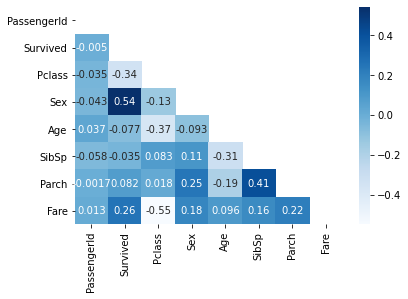

In [270]:
mask=np.zeros_like(train.corr(),dtype=bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(train.corr(),annot=True,cmap='Blues',mask=mask)

성별과 생존비율과 자녀수와 형제가족수, 등급수와 좌석금액이 상관관계가 있다.

In [271]:
train.drop('Fare',axis=1,inplace=True)
test.drop('Fare',axis=1,inplace=True)

In [272]:
making_prediction0=train[~train['Age'].isna()]
making_prediction1=train[train['Age'].isna()]

In [273]:
lgb=LGBMClassifier()

In [274]:
age_features=['Survived','Pclass','Sex','SibSp','Parch']
age_target='Age'

In [275]:
X_train=making_prediction0[age_features]
X_test=making_prediction1[age_features]
Y_train=making_prediction0[age_target]
Y_train=Y_train.astype(int)

In [276]:
lgb.fit(X_train,Y_train)

LGBMClassifier()

In [277]:
age_prediction=lgb.predict(X_test)

In [278]:
making_prediction1['Age']=age_prediction

<ipython-input-278-85c9679f88c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  making_prediction1['Age']=age_prediction


In [279]:
making_prediction1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
5,6,0,3,0,22,0,0
17,18,1,2,0,42,0,0
19,20,1,3,1,22,0,0
26,27,0,3,0,22,0,0
28,29,1,3,1,22,0,0
...,...,...,...,...,...,...,...
859,860,0,3,0,22,0,0
863,864,0,3,1,16,8,2
868,869,0,3,0,22,0,0
878,879,0,3,0,22,0,0


In [280]:
new=pd.concat([making_prediction0,making_prediction1])

In [281]:
new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
859,860,0,3,0,22.0,0,0
863,864,0,3,1,16.0,8,2
868,869,0,3,0,22.0,0,0
878,879,0,3,0,22.0,0,0


In [283]:
age_features=['Pclass','Sex','SibSp','Parch']
age_target='Age'
making_prediction2=test[~test['Age'].isna()]
making_prediction3=test[test['Age'].isna()]
X1_train=making_prediction2[age_features]
X1_test=making_prediction3[age_features]
Y1_train=making_prediction2[age_target]
Y1_train=Y1_train.astype(int)
lgb.fit(X1_train,Y1_train)
age_prediction1=lgb.predict(X1_test)
making_prediction3['Age']=age_prediction1
test=pd.concat([making_prediction2,making_prediction3])


ValueError: Input data must be 2 dimensional and non empty.

In [284]:
test['Age']=rs.fit_transform(test['Age'].to_frame(name='Age'))

In [285]:
new

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
859,860,0,3,0,22.0,0,0
863,864,0,3,1,16.0,8,2
868,869,0,3,0,22.0,0,0
878,879,0,3,0,22.0,0,0


In [286]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,0.59375,0,0
1,893,3,1,1.37500,1,0
2,894,2,0,2.31250,0,0
3,895,3,0,0.12500,0,0
4,896,3,1,-0.18750,1,1
...,...,...,...,...,...,...
408,1300,3,1,-0.43750,0,0
410,1302,3,1,-0.43750,0,0
413,1305,3,0,-0.25000,0,0
416,1308,3,0,-0.25000,0,0


In [289]:
new['Age']=rs.fit_transform(new['Age'].to_frame(name='Age'))

In [295]:
new.astype(int)

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
dtype: object

In [292]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,0.59375,0,0
1,893,3,1,1.37500,1,0
2,894,2,0,2.31250,0,0
3,895,3,0,0.12500,0,0
4,896,3,1,-0.18750,1,1
...,...,...,...,...,...,...
408,1300,3,1,-0.43750,0,0
410,1302,3,1,-0.43750,0,0
413,1305,3,0,-0.25000,0,0
416,1308,3,0,-0.25000,0,0


In [290]:
features=['Pclass','Sex','Age','SibSp','Parch']
target='Survived'
X2_train=new[features]
X2_test=test[features]
Y2_train=new[target]

In [293]:
lgb.fit(X2_train,Y2_train)

LightGBMError: Number of classes should be specified and greater than 1 for multiclass training